In [91]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error , mean_absolute_error , accuracy_score , r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split ,KFold, cross_val_score

In [94]:
df=pd.read_csv('Laptop_price.csv')
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093060
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605920
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728330
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990720


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Processor_Speed,1000.0,2.750611,0.731796,1.511580,2.089246,2.760885,3.362610,3.998534
RAM_Size,1000.0,15.500000,10.988665,4.000000,8.000000,16.000000,32.000000,32.000000
Storage_Capacity,1000.0,584.576000,313.438517,256.000000,256.000000,512.000000,1000.000000,1000.000000
Screen_Size,1000.0,14.056790,1.705882,11.012111,12.635523,14.099643,15.528589,16.985737
Weight,1000.0,3.466919,0.866541,2.000560,2.717211,3.464630,4.212583,4.990728
Price,1000.0,19604.187963,9406.064880,8570.012950,10114.012945,17287.241880,31566.214750,33503.935040


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [97]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [98]:
brand_num = df['Brand'].value_counts()
brand_num

Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: Brand, dtype: int64

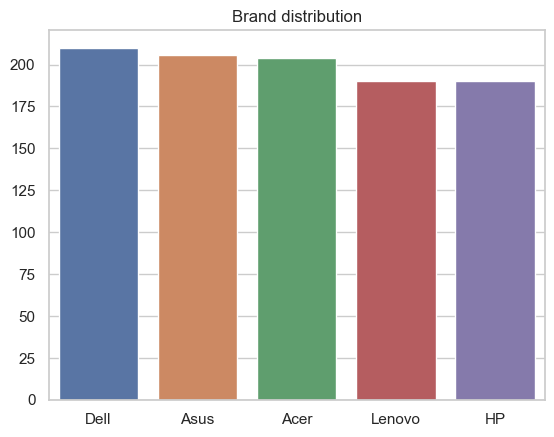

In [99]:
sns.set_theme(style = 'whitegrid')

sns.barplot(data = df, x= brand_num.index, y = brand_num.values, palette ='deep')
plt.title('Brand distribution')
plt.show()

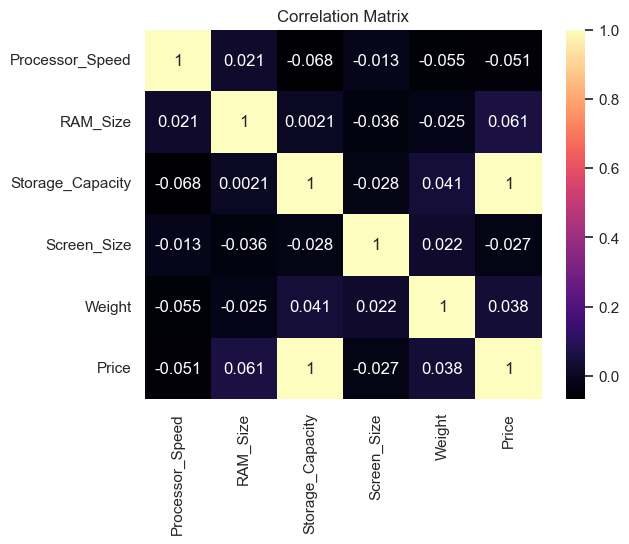

In [100]:
df_corr = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']

sns.heatmap(df[df_corr].corr(), annot = True, cmap = 'magma')
plt.title('Correlation Matrix')
plt.show()

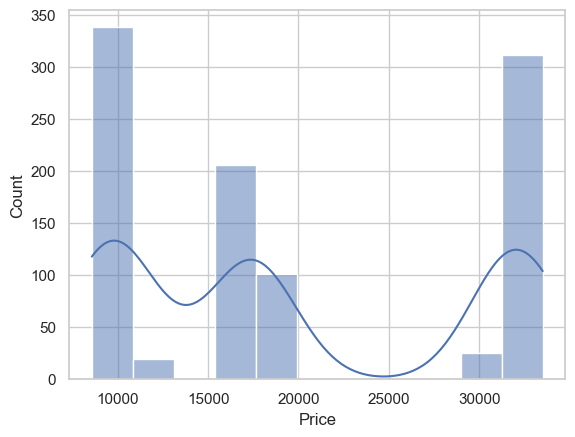

In [101]:
sns.histplot(data = df, x='Price', kde = True)
plt.show()

# Preprocessing

In [102]:
encoder = LabelEncoder()
df['Brand'] = encoder.fit_transform(df['Brand'])

In [103]:
df['Brand']

0      1
1      0
2      4
3      0
4      0
      ..
995    3
996    2
997    2
998    1
999    4
Name: Brand, Length: 1000, dtype: int32

In [104]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093060
1,0,2.912833,4,1000,11.311372,3.260012,31607.605920
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728330
4,0,3.268097,32,1000,14.990877,4.193472,32917.990720


In [106]:
#col_names = list(df.columns)
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

<Axes: >

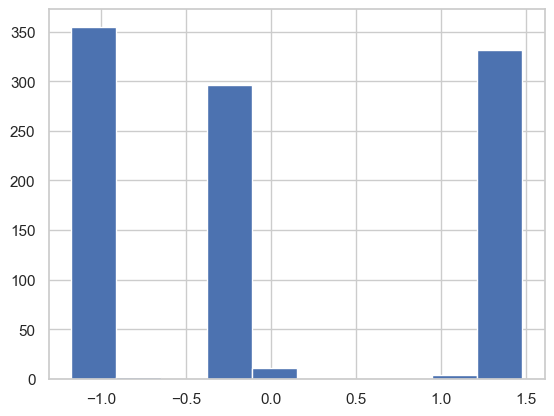

In [105]:
y.hist()

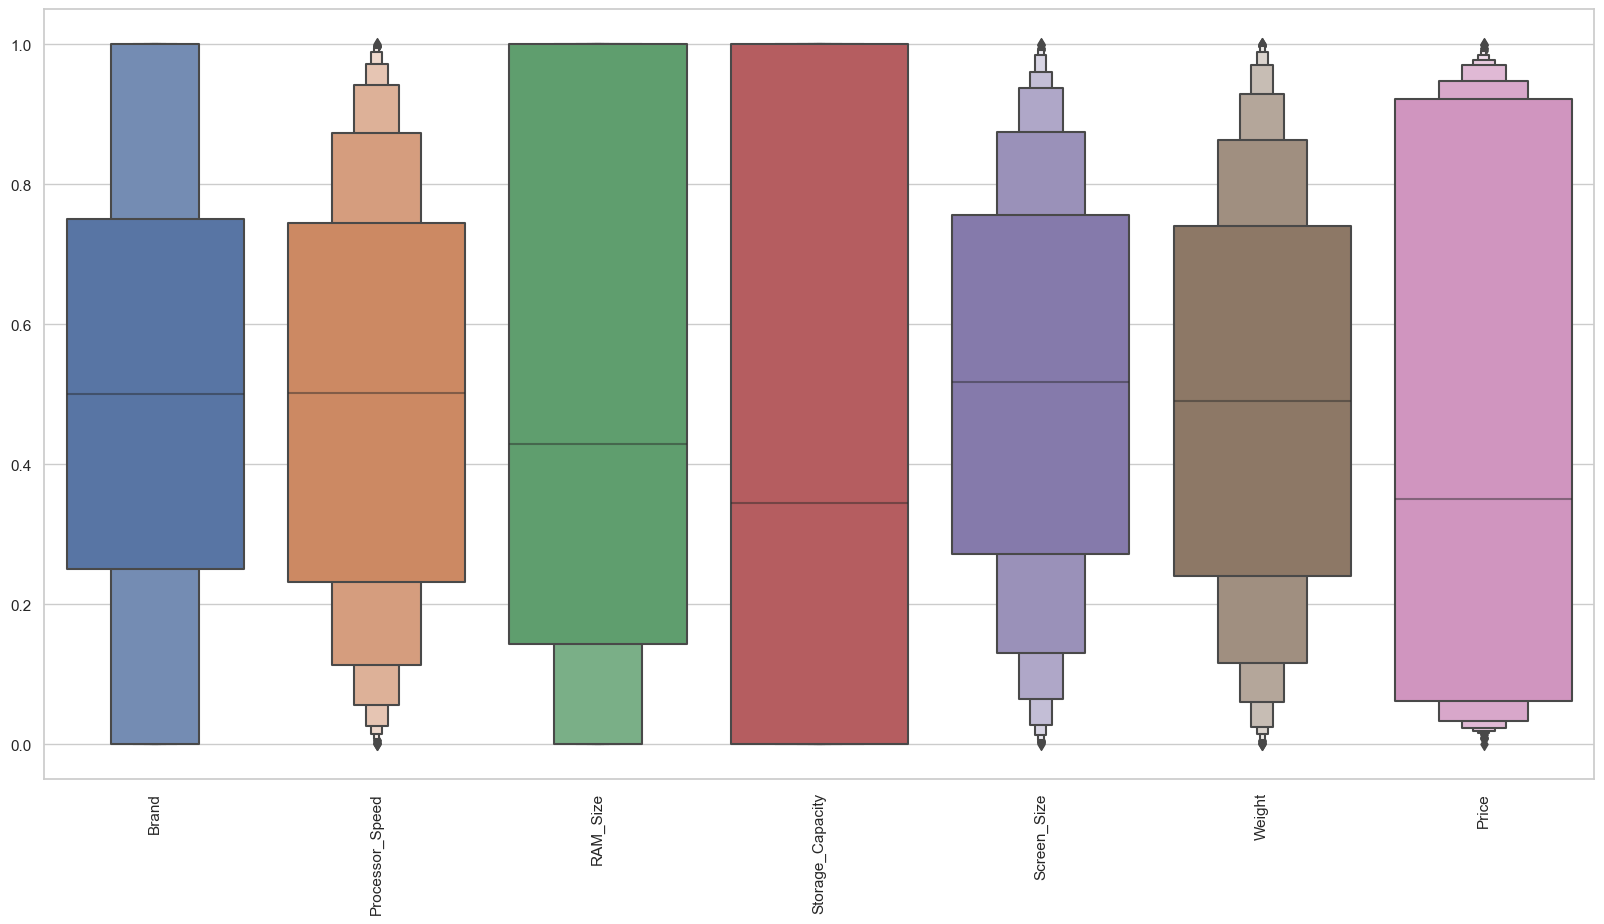

In [107]:
#detecting outliers
plt.figure(figsize=(20,10))
sns.boxenplot(data = scaled_df)
plt.xticks(rotation=90)
plt.show()

In [108]:
scaled_df.sample()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
981,0.25,0.435242,0.0,0.0,0.442177,0.313031,0.028378


In [109]:
# Splitting the dataset into training and testing sets.
x = scaled_df.drop('Price' , axis=1)
y=scaled_df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)


In [110]:
# Initialize K-Fold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(x_train,y_train):
    x_train_fold, x_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

In [111]:
x_train_fold.shape , y_train_fold.shape

((640, 6), (640,))

# Modeling

In [112]:
from sklearn.svm import SVR
regressor = SVR()
#'C': 1.0,'gamma': 'scale','kernel': 'rbf',
regressor.fit(x_train_fold, y_train_fold)

SVR()

In [113]:

y_pred = regressor.predict(x_test_fold)

In [114]:
print("Accuracy:", r2_score(y_test_fold, y_pred))


Accuracy: 0.9743191065752852


In [115]:
print(f"cross validation score : {cross_val_score(regressor, x_train, y_train, cv=5).mean()}")

cross validation score : 0.9744311026042187


In [116]:

train_r2 = regressor.score(x_train_fold, y_train_fold)
print(train_r2)

0.9816017594965205


In [117]:
mae = mean_absolute_error(y_test_fold, y_pred)
mse = mean_squared_error(y_test_fold, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.04790910074865197
Mean Squared Error: 0.0034021044637220716


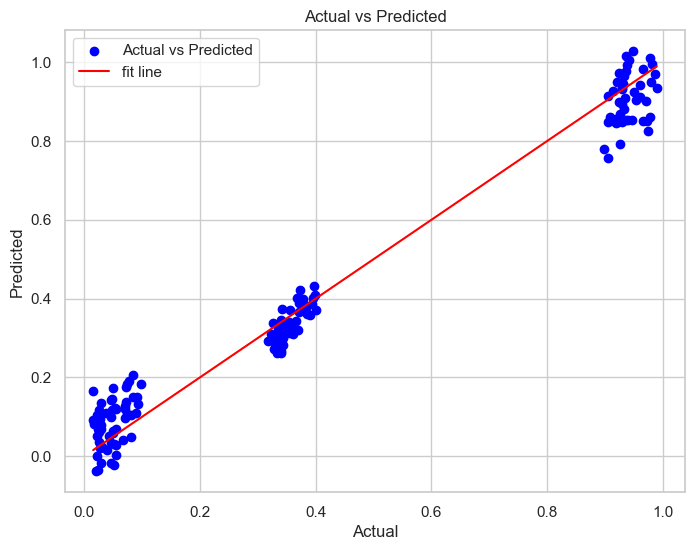

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_fold, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test_fold.min(), y_test_fold.max()], [y_test_fold.min(), y_test_fold.max()], color='red', label='fit line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [119]:
import joblib
joblib.dump(regressor, 'Y_model.joblib')
loaded_model = joblib.load('Y_model.joblib')

In [43]:
scaler1 = StandardScaler()
scaled_df1 = scaler.fit_transform(df.drop('Price',axis=1))

In [124]:
import tkinter as tk
from tkinter import messagebox
# Function to predict based on input values
def predict_price():
    # Read input values
    brand = brand_entry.get()
    processor_speed = float(processor_speed_entry.get())
    ram_size = float(ram_size_entry.get())
    storage_capacity = float(storage_capacity_entry.get())
    screen_size = float(screen_size_entry.get())
    weight = float(weight_entry.get())

    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'Brand': [brand],
        'Processor_Speed': [processor_speed],
        'RAM_Size': [ram_size],
        'Storage_Capacity': [storage_capacity],
        'Screen_Size': [screen_size],
        'Weight': [weight]
    })
    
    # Use the loaded model to make predictions
    prediction = loaded_model.predict(input_data)
    pred=prediction[0]
    output=(pred*9406.064880)+19604.187963
   # result_label.config(text="Predicted Price: {:.2f}".format(output))
    messagebox.showinfo("Prediction Result: ", {output})
# Create Tkinter window
root = tk.Tk()
root.title("Price Prediction")

# Create input labels and entry widgets
brand_label = tk.Label(root, text="Brand:")
brand_label.grid(row=0, column=0)
brand_entry = tk.Entry(root)
brand_entry.grid(row=0, column=1)

processor_speed_label = tk.Label(root, text="Processor Speed:")
processor_speed_label.grid(row=1, column=0)
processor_speed_entry = tk.Entry(root)
processor_speed_entry.grid(row=1, column=1)

ram_size_label = tk.Label(root, text="RAM Size:")
ram_size_label.grid(row=2, column=0)
ram_size_entry = tk.Entry(root)
ram_size_entry.grid(row=2, column=1)

storage_capacity_label = tk.Label(root, text="Storage Capacity:")
storage_capacity_label.grid(row=3, column=0)
storage_capacity_entry = tk.Entry(root)
storage_capacity_entry.grid(row=3, column=1)

screen_size_label = tk.Label(root, text="Screen Size:")
screen_size_label.grid(row=4, column=0)
screen_size_entry = tk.Entry(root)
screen_size_entry.grid(row=4, column=1)

weight_label = tk.Label(root, text="Weight:")
weight_label.grid(row=5, column=0)
weight_entry = tk.Entry(root)
weight_entry.grid(row=5, column=1)

# Create button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=predict_price)
predict_button.grid(row=6, column=0, columnspan=2)

# Create label to display prediction result
result_label = tk.Label(root, text="")
result_label.grid(row=7, column=0, columnspan=2)

# Run Tkinter event loop
root.mainloop()
